## What is CNN?
CNN (Convolutional Neural Network) is a type of deep learning network that works very well with images. Unlike regular neural networks, CNNs exploit spatial structure of images by using convolutional layers to extract patterns like edges, textures, and shapes.

## Real-World Applications:
- Object recognition: Self-driving cars, drones

- Medical imaging: Detecting tumors

- Face recognition: Security apps

- Satellite imaging: Land use classification

## CNN Architecture Components
- Input Layer: The image

- Convolutional Layer: Applies filters/kernels to detect features.

- Activation Layer: Adds non-linearity.

- Pooling Layer (MaxPooling): Reduces image dimensions, keeps important features.

- Flatten Layer: Converts 2D feature maps to 1D vector for fully connected layers.

- Fully Connected Layer (Dense): Learns combinations of features for classification.

- Output Layer: the output.

In [1]:
# Import libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize pixel values to [0,1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Print dataset shapes
print("Training images shape:", x_train.shape)  # (50000, 32, 32, 3)
print("Training labels shape:", y_train.shape)  # (50000, 1)
print("Test images shape:", x_test.shape)       # (10000, 32, 32, 3)
print("Test labels shape:", y_test.shape)       # (10000, 1)

Training images shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test images shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


In [5]:
# Class names for CIFAR-10
class_names = ['airplane','automobile','bird','cat','deer', 'dog','frog','horse','ship','truck']

C:\Users\Byte\AppData\Local\Temp\ipykernel_3880\824929645.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(class_names[int(y_train[i])])


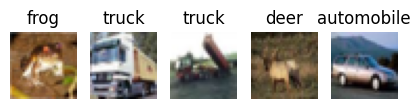

In [7]:
# Visualize first 5 training images
plt.figure(figsize=(5,2))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[int(y_train[i])])
    plt.axis('off')
plt.show()

#### Explanation:

- We normalized the images so pixel values are between 0 and 1 (helps training).

- CIFAR-10 images are 32x32 RGB.

- Visualization shows what the CNN will “see” as input.

In [8]:
# Build CNN Model
model = models.Sequential()

# 1st Convolution + Pooling
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))

d:\A Code\ML-Playground\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


- 32 → number of filters → CNN learns 32 different patterns (edges, curves, textures).

- (3,3) → filter size → each filter looks at a 3x3 patch of the image at a time.

- ReLU activation → adds non-linearity, lets CNN learn complex patterns.

- input_shape=(32,32,3)
    - 32x32 → Height and width of the input image.

    - 3 → Number of channels (RGB).

    - The network sees each image as a 3D tensor.

In [9]:
model.add(layers.MaxPooling2D((2,2)))

- (2,2) → pool size → looks at 2x2 blocks and keeps the maximum value.
- Why:

    - Reduces image size → 30x30 → 15x15 (less computation)

    - Keeps strongest features

    - Adds translation invariance (detect patterns even if shifted)

In [10]:
# Second Convolutional Layer
model.add(layers.Conv2D(64, (3,3), activation='relu'))


- 64 filters → learns more complex patterns (combinations of edges, textures).

- (3,3) filter → still focusing on local regions.

- Input is the pooled output from previous layer (15x15x32).

In [11]:
# Second MaxPooling Layer
model.add(layers.MaxPooling2D((2,2)))


- Pool size 2x2 reduces 13x13 → 6x6.

- Keeps most important features, reduces computation.

In [12]:
# Third Convolutional Layer
model.add(layers.Conv2D(64, (3,3), activation='relu'))

- Learns even more complex features, like combinations of shapes or textures.

- Output size: 4x4x64.

In [13]:
# flatten layer
model.add(layers.Flatten())

- Converts 3D feature maps → 1D vector.

- Example: 4x4x64 → 1024 neurons.

- Prepares data for fully connected layer (Dense).

- Why: Dense layers require 1D input.

In [14]:
# Fully Connected Layer
model.add(layers.Dense(64, activation='relu'))

- 64 neurons → combines all features detected by CNN.

- Learns patterns across the entire image.

In [15]:
# Output Layer
model.add(layers.Dense(10, activation='softmax'))

- 10 neurons → 10 classes (CIFAR-10)

- Softmax → converts values into probabilities for each class.

In [16]:
# Compile & Train
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.4437 - loss: 1.5270 - val_accuracy: 0.5379 - val_loss: 1.2898
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.5948 - loss: 1.1458 - val_accuracy: 0.6235 - val_loss: 1.0793
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6540 - loss: 0.9888 - val_accuracy: 0.6465 - val_loss: 0.9930
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.6860 - loss: 0.8980 - val_accuracy: 0.6685 - val_loss: 0.9438
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7107 - loss: 0.8289 - val_accuracy: 0.6975 - val_loss: 0.8773
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.7278 - loss: 0.7748 - val_accuracy: 0.7000 - val_loss: 0.8798
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7466 - loss: 0.7277 - val_accuracy: 0.6892 - val_loss: 0.8892
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7615 - loss: 

- Adam optimizer → adjusts weights efficiently.

- Sparse categorical crossentropy → works with integer labels.

- Training adjusts filters and Dense weights to minimize loss.

![ChatGPT Image Sep 21, 2025, 06_58_27 PM.png](<attachment:ChatGPT Image Sep 21, 2025, 06_58_27 PM.png>)
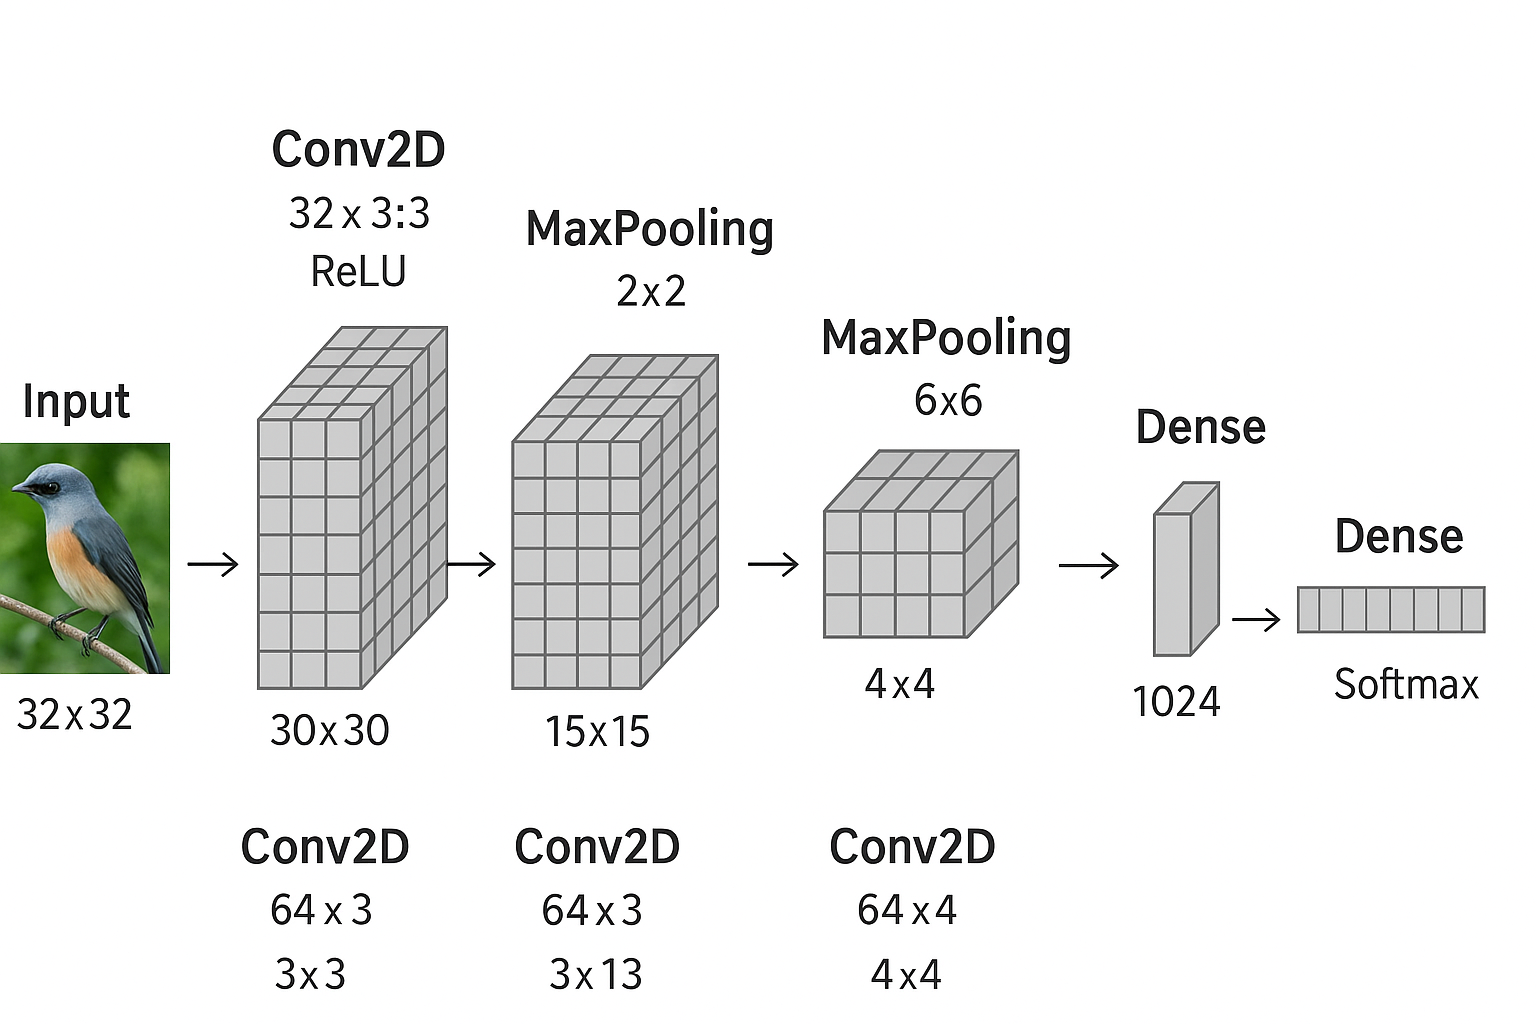

In [17]:
# Evaluate Model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7186 - loss: 0.8473
Test accuracy: 0.7186


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


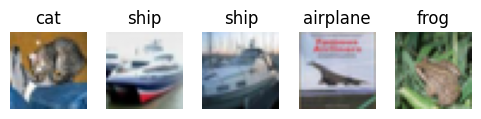

In [23]:
# Visualize Predictions
# Predict first 5 test images
predictions = model.predict(x_test[:5])

import numpy as np
plt.figure(figsize=(6,1))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_test[i])
    plt.title(f"{class_names[np.argmax(predictions[i])]}") #predicated value
    plt.axis('off')
plt.show()
